### Non-linearly separable Dataset

- Here I have used the spiral dataset which has been given in some of the notebooks. This is a non-linearly separable dataset. This will be used to check whether the model works or not.

(600, 2)
(600,)


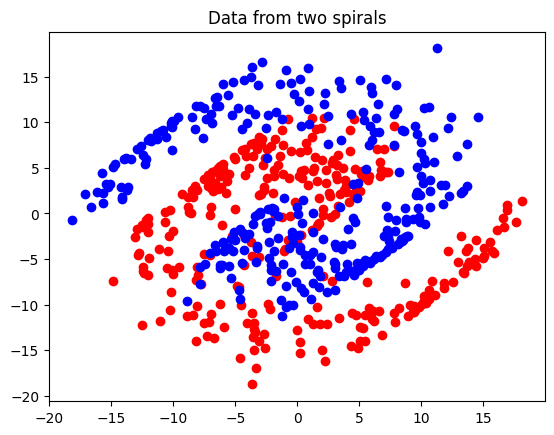

In [139]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

num_samples = 600
angle = np.linspace(0,2*pi,int(num_samples/2))
mean = [0.0, 0.0]
cov = [ [6.0, 6.0], [6.0, 6.0] ] 

X = np.zeros( (num_samples, 2) ) 

r_1 = 2*angle + pi
data_1 = np.array([np.cos(angle)*r_1, np.sin(angle)*r_1]).T
#print(data_1.shape)
X_1 = data_1 + np.random.multivariate_normal(mean, cov, int(num_samples/2)) #np.random.randn(int(num_samples/2),2)
X[:int(num_samples/2),:] = X_1

r_2 = -2*angle - pi
data_2 = np.array([np.cos(angle)*r_2, np.sin(angle)*r_2]).T
X_2 = data_2 + np.random.multivariate_normal(mean, cov, int(num_samples/2)) #np.random.randn(int(num_samples/2),2)
X[int(num_samples/2):,:] = X_2

y = np.ones(num_samples)
y[int(num_samples/2):] = -1*y[int(num_samples/2)]
#print(y)


print(X.shape)
print(y.shape)

figure, axes = plt.subplots(1) 
 

plt.scatter(X[:int(num_samples/2),0],X[:int(num_samples/2),1], marker='o', color='red')
plt.scatter(X[int(num_samples/2):,0],X[int(num_samples/2):,1], marker='o', color='blue')


plt.title( 'Data from two spirals' ) 
plt.show() 


In [140]:
zeta=0.2 # Slack variable
lr=0.0001 # Learning rate

- Slack variable has been added to the prediction term to account for some sort of variability.

In [141]:
# This is the prediction function.
# Here I have added a sigmoid activation function at the end.

def prediction(w, x):
    #Write code to return a prediction of +1 or -1 according to the perceptron prediction rule 
    pred=[]
    m=np.dot(x,w)+zeta # Here zeta is added to allow for slack variability
    sig=1/(1+np.exp(-m))
    for i in range(sig.shape[0]):
        if(sig[i]>0.5):
            sig[i]=1
        else:
            sig[i]=-1
    return sig

In [142]:
def update_weights(weight, y_label, x_feature, y_pred, misclass):
    #write code to update weight and add 1 to misclass if the perceptron misclassifies x_feature
    #print(y_label.shape)
    misclass=0
    for i in range(y_label.shape[0]):
        #print(y_label,y_pred)
        if(y_label[i]!=y_pred[i]): # Checking if the classified label is correct.
            misclass+=1
        
        if((1-np.dot(y_label[i],[np.dot(weight,x_feature[i,:])])[0])>zeta): # Loss function used her is similar to SVM Hinge Loss
            #print(weight.shape,y_label[i].shape)
            weight=weight+lr*np.dot(y_label[i],weight) # Equation derived by taking the gradient of loss function
    
    return weight , misclass

In [143]:
def perceptron_training(X,Y):
    
    w =np.random.randn(3)  # randomly generating w
    print(w)
    flag=0
    mistakes = 0
    epochs=0

    while flag==0 and epochs<100:   # until mistakes are not zero or number of epochs reach 50
        mistakes=0

        for i in range(X.shape[0]):
            x = X
            x = np.hstack((x, np.ones((x.shape[0], 1)))) # Adding bias term
            y_hat = prediction(w, x)            
            y = Y
            
            w , mistakes= update_weights(w, y, x, y_hat, mistakes)
        print(mistakes,w)
        epochs=epochs+1
        if mistakes==0:
            flag=1             
    return w, mistakes

In [144]:

perceptron_training(X,y)

[-1.30469181  0.97348223  0.57174143]
301 [-1.13613935  0.84771856  0.49787845]
300 [-0.88417431  0.65971746  0.38746245]
300 [-0.6537328   0.48777593  0.28647848]
299 [-0.42086524  0.31402423  0.18443137]
296 [-0.23928468  0.17853977  0.10485922]
295 [-0.18769633  0.14004767  0.0822522 ]
293 [-0.13347557  0.09959141  0.0584916 ]
285 [-0.07466691  0.05571194  0.0327205 ]
281 [-0.06549311  0.048867    0.02870036]
281 [-0.06537532  0.04877912  0.02864874]
281 [-0.06525776  0.0486914   0.02859722]
281 [-0.0651404   0.04860383  0.02854579]
282 [-0.06502325  0.04851642  0.02849446]
282 [-0.06490631  0.04842917  0.02844321]
282 [-0.06478959  0.04834208  0.02839206]
282 [-0.06467307  0.04825514  0.028341  ]
282 [-0.06455676  0.04816836  0.02829003]
281 [-0.06444067  0.04808173  0.02823916]
281 [-0.06432478  0.04799526  0.02818837]
281 [-0.0642091   0.04790895  0.02813768]
281 [-0.06409362  0.04782279  0.02808708]
281 [-0.06397836  0.04773679  0.02803657]
281 [-0.0638633   0.04765094  0.027986

(array([-0.05559787,  0.04148377,  0.02436407]), 280)

### COMMENTS :

- From the observations obtained it can be seen that the amount of misclassified points is completely dependent on the initail values of weights.

- By adding the slack variables it can be seen that the perceptron algorithm is able to classify over 53 % of the datapoints accurately.

- There can be seen no major decrease in misclassified samples except in the beginning. This can be due to the fact that the data points used here belongs to a highly non-linear symmetric dataset.

- Slack variable term has also been added to the prediction to account for certain degree of misclassifiaction.

- Overall this algorithm can be said to work with some degree of accuracy. Although the slack variable zeta needs to be tuned properly. The Loss function used here is similar to SVM Hinge Loss with slack variables.